# Quetsion#2 


## Write a function that convolves an image with a given convolution filter
## function [output_Image]= myImageFilter( Input_image, filter)

### Python function that can handle the convolution of an image with filters: averaging, Gaussian, and Sobel operators

In [15]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def generate_gaussian_kernel(sigma):
    size = int(2 * sigma + 1)
    gaussian_kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), (size, size))
    gaussian_kernel /= np.sum(gaussian_kernel)
    return gaussian_kernel

def myImageFilter(input_image, kernel):
    # Apply the convolution
    output_image = convolve2d(input_image, kernel, mode='same', boundary='symm')
    
    # Clip the values to be in 0-255
    output_image = np.clip(output_image, 0, 255)

    return output_image.astype(np.uint8)

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define the averaging kernels
averaging_kernel_3x3 = np.ones((3, 3), np.float32) / 9
averaging_kernel_5x5 = np.ones((5, 5), np.float32) / 25

# Define the Gaussian kernels
gaussian_kernels = [generate_gaussian_kernel(sigma) for sigma in [1, 2, 3]]

1- Averaging Kernel (3×3 and 5×5 )  
2- Gaussian Kernel (σ = 1,2,3 ) Use (2σ +1)×(2σ +1) as size of Kernel (You may write 
a separate function to generate Gaussian Kernels for different values of σ). Discuss 
the results in your report.

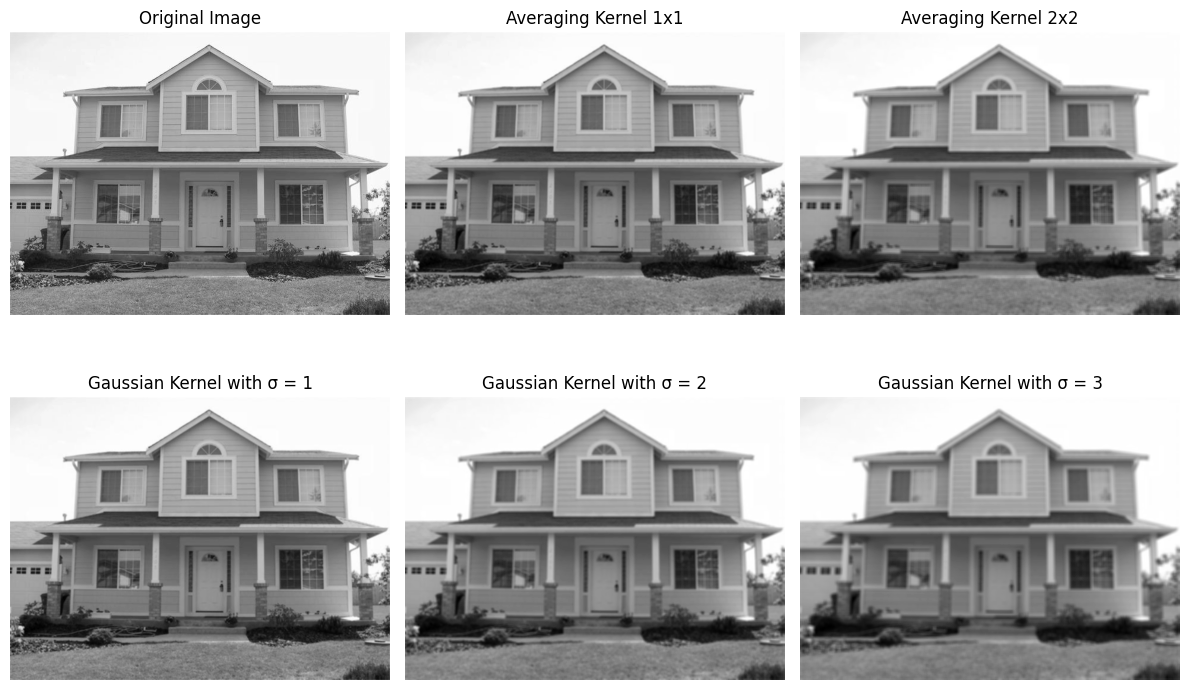

In [16]:
import cv2

def test_kernels_on_image(image_path):
    # Read the image in grayscale
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define the kernels
    averaging_kernels = [averaging_kernel_3x3, averaging_kernel_5x5]
    gaussian_kernels = [generate_gaussian_kernel(sigma) for sigma in [1, 2, 3]]

    # Create a subplot with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Plot the original image in the first row
    axes[0, 0].imshow(input_image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Test averaging kernels
    for i, kernel in enumerate(averaging_kernels, start=1):
        output_image = myImageFilter(input_image, kernel)
        axes[0, i].imshow(output_image, cmap='gray')
        axes[0, i].set_title(f'Averaging Kernel {i}x{i}')
        axes[0, i].axis('off')

    # Test Gaussian kernels
    for i, (sigma, kernel) in enumerate(zip([1, 2, 3], gaussian_kernels), start=1):
        output_image = myImageFilter(input_image, kernel)
        axes[1, i-1].imshow(output_image, cmap='gray')
        axes[1, i-1].set_title(f'Gaussian Kernel with σ = {sigma}')
        axes[1, i-1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


test_kernels_on_image('A1/A1/House1.jpg')


### 3- Sobel Edge Operators
### 4- Prewitt Edge Operators

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_gaussian_kernel(sigma):
    size = int(2 * sigma + 1)
    gaussian_kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), (size, size))
    gaussian_kernel /= np.sum(gaussian_kernel)
    return gaussian_kernel

def myImageFilter(input_image, kernel):
    padded_image = np.pad(input_image, [(kernel.shape[0]//2, kernel.shape[0]//2), (kernel.shape[1]//2, kernel.shape[1]//2)], mode='reflect')
    output_image = np.zeros(input_image.shape, dtype=np.float32)
    
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            output_image[i, j] = np.sum(kernel * padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]])
    return np.abs(output_image)

def normalize(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = (image - min_val) / (max_val - min_val) * 255
    return normalized.astype(np.uint8)

# Display the results
def display_results(images, titles):
    plt.figure(figsize=(15, 5))

    # Plot the images in one row
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    
    


In [18]:
def sobel_filter(image_path):
    image = cv2.imread(image_path, 0)
    # Sobel kernels
    sobel_x = np.array([[-1, -2, -1],
                        [0,  0,  0],
                        [1,  2,  1]], dtype=np.float32)
                    
    sobel_y = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)
    

    # Apply Sobel filters
    sobelxImage = myImageFilter(image, sobel_x)
    sobelyImage = myImageFilter(image, sobel_y)
    sobelGrad = np.sqrt(sobelxImage**2 + sobelyImage**2)

    # Normalize the images for display
    norm_sobelx = normalize(sobelxImage)
    norm_sobely = normalize(sobelyImage)
    norm_sobelGrad = normalize(sobelGrad)

    display_results([norm_sobelx, norm_sobely, norm_sobelGrad], ["Gx Sobel Filter", "Gy Sobel Filter", "Gradient Magnitude for Sobel"])
    return norm_sobelGrad

def prewitt_filter(image_path):
    image = cv2.imread(image_path, 0)
    # Prewitt kernels
    prewitt_y = np.array([[-1, 0, 1], 
                          [-1, 0, 1], 
                          [-1, 0, 1]], dtype=np.float32)
    
    prewitt_x = np.array([[1, 1, 1], 
                          [0, 0, 0], 
                          [-1, -1, -1]], dtype=np.float32)
    
    # Apply Prewitt filters
    prewitt_x = myImageFilter(image, prewitt_x)
    prewitt_y = myImageFilter(image, prewitt_y)
    prewitt_output = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Normalize the images for display
    norm_prewitt_x = normalize(prewitt_x)
    norm_prewitt_y = normalize(prewitt_y)
    norm_prewitt_output = normalize(prewitt_output)

    display_results([norm_prewitt_x, norm_prewitt_y, norm_prewitt_output], ["Gx Prewitt Filter", "Gy Prewitt Filter", "Gradient Magnitude for Prewitt"])
    return norm_prewitt_output


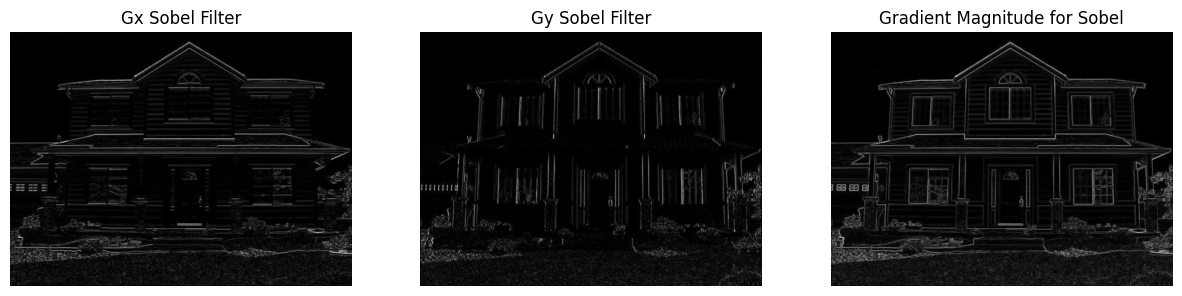

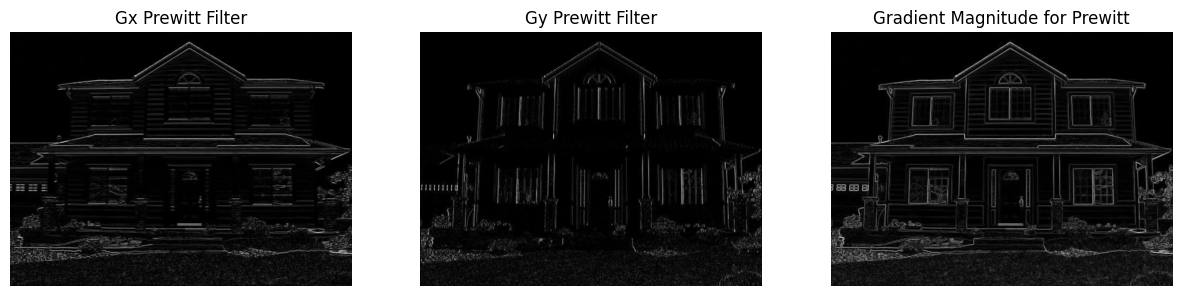

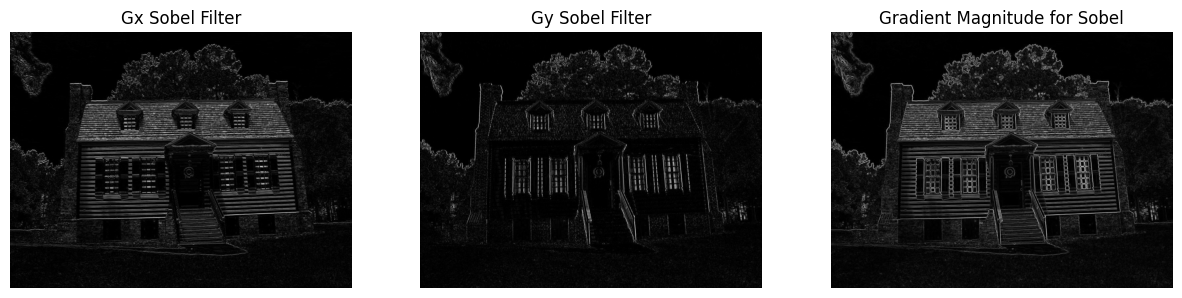

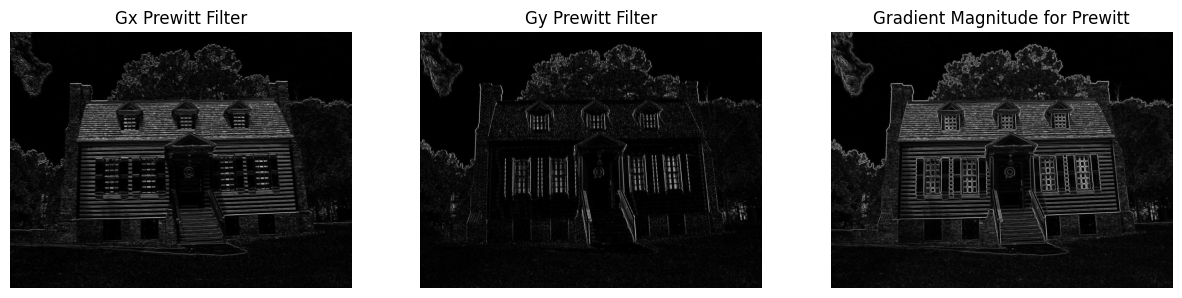

In [19]:
x1= sobel_filter('A1/A1/House1.jpg')
y1= prewitt_filter('A1/A1/House1.jpg')
x2= sobel_filter('A1/A1/House2.jpg')
y2= prewitt_filter('A1/A1/House2.jpg')

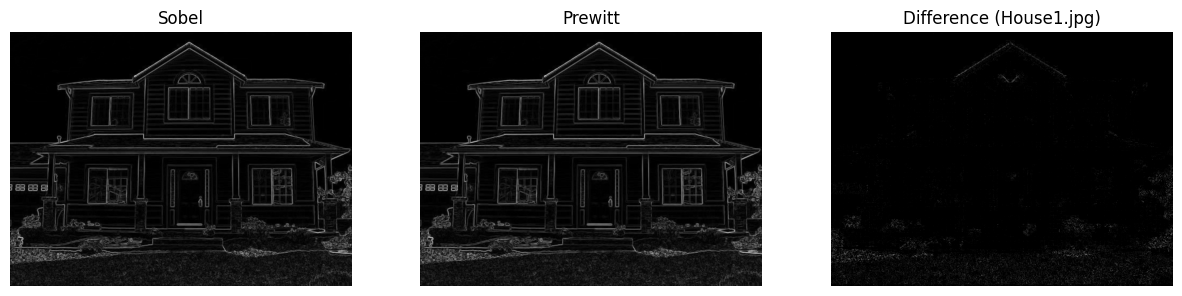

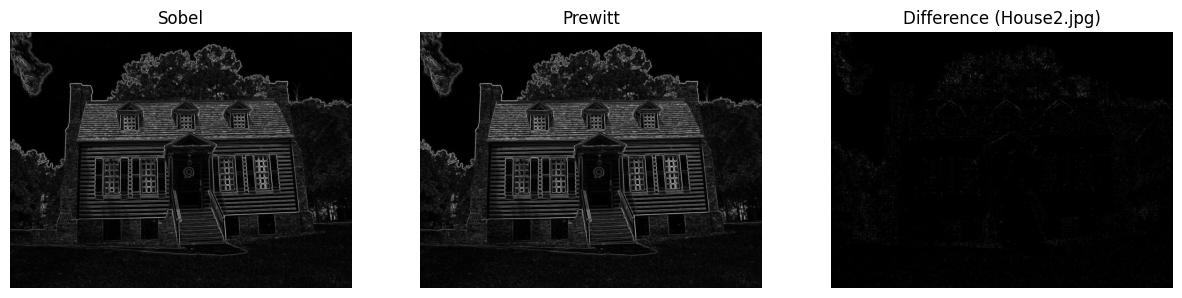

In [20]:
diff1 = cv2.subtract(x1, y1)

display_results([x1, y1, diff1], ["Sobel", "Prewitt", "Difference (House1.jpg)"])

plt.show()

diff2 = cv2.subtract(x2, y2)

display_results([x2, y2, diff2], ["Sobel", "Prewitt", "Difference (House2.jpg)"])

plt.show()